**Importing all the required libraries**


In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt

**Reading the dataset using pandas library**

In [2]:
dataset=pd.read_csv('Weather prediction dataset - Sheet1.csv')
dataset.head()

,Day,Month,Year,Humidity,Max Temperature,Min Temperature,Rainfall,Sea Level Pressure,Sunshine,Wind Speed,Cloud
0,1,1,1988,77,26.7,12.9,0,1016.9,8.4,0.0,0
1,2,1,1988,76,26.0,12.9,0,1016.4,8.4,0.0,0
2,3,1,1988,73,27.5,14.5,0,1014.8,7.8,2.0,1
3,4,1,1988,71,27.2,15.8,0,1015.9,6.4,5.0,1
4,5,1,1988,75,27.8,15.4,0,1016.1,8.0,3.5,1


**Declaring the target variable which is to be predicted and the remaining features from the dataset**

In [3]:
features = ['Day','Month','Year','Humidity','Max Temperature','Min Temperature',
            'Rainfall','Sea Level Pressure','Sunshine','Wind Speed']
target = 'Cloud'

**Splitting the dataset into train and test dataset in the ratio 70:30**



In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dataset[features], dataset[target],
                                                    train_size=0.7, test_size=0.3, shuffle=False)

**Since the data is in different units we standardise it using the StandardScaler library
The idea behind StandardScaler is that it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1**

In [5]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  
print(x_train)

[[-1.61245155  0.          0.          0.75019377 -0.8231267  -1.33403841
   0.          1.14269236  0.42513637 -1.08022728]
 [-1.36438208  0.          0.          0.27279774 -1.76110828 -1.33403841
   0.          0.68033129  0.42513637 -1.08022728]
 [-1.11631261  0.          0.         -1.15939038  0.24885226  0.03671665
   0.         -0.79922413  0.15043287  0.10590464]
 [-0.86824314  0.          0.         -2.11418245 -0.15313985  1.15045514
   0.          0.21797022 -0.49054196  1.88510251]
 [-0.62017367  0.          0.         -0.2045983   0.65084437  0.80776638
   0.          0.40291465  0.2420007   0.99550357]
 [-0.3721042   0.          0.         -1.15939038  1.85682069  1.92150487
   0.         -1.53900184 -3.42071262  0.10590464]
 [-0.12403473  0.          0.          0.27279774  0.11485489  0.97911076
   0.         -0.70675192  0.42513637 -1.08022728]
 [ 0.12403473  0.          0.          1.22758981 -0.68912933 -0.3916443
   0.          0.49538686  0.2420007  -1.08022728]
 

**We have used DescisionTreeClassifier to classify the target variable ie cloudy , which would classify as cloudy-1 or not cloudy 0. The criterion used is gini index as we achieved maximum accuracy using it and max_depth is 6 after trying many combinations**


In [6]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini', max_depth=6)
model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

**Printed the training accuracy and testing accuracy**


In [7]:
print ("Training Accuracy: {}".format(model.score(x_train, y_train)))
predicted = model.predict(x_test)
print ("Testing Accuracy: {}".format(accuracy_score(y_test, predicted)))

Training Accuracy: 1.0
Testing Accuracy: 0.8571428571428571


**Finding out the cross validation accuracy for 3 folds**

In [10]:
print("Cross Validation Accuracy: \n")
cv_accuracy = cross_val_score(estimator=model, X=x_train, y=y_train, cv=3)
print("Accuracy using 3 folds: ")
print(cv_accuracy)


Cross Validation Accuracy: 

Accuracy using 3 folds: 
[1.   0.8  0.75]


**Printing the mean accuracy and Standard Deviation**

In [11]:
print("Mean accuracy: {}".format(cv_accuracy.mean()))
print("Standard Deviation: {}".format(cv_accuracy.std()))

Mean accuracy: 0.85
Standard Deviation: 0.10801234497346433


**Plotted the confusion matrix for it**

In [12]:
from sklearn.metrics import confusion_matrix,accuracy_score,plot_confusion_matrix
cm = confusion_matrix(y_test,predicted)
acc = accuracy_score(y_test,predicted)
print(cm)
print(acc)


[[6 1]
 [0 0]]
0.8571428571428571


**Plotted the graphical confusion martix**

[[6 1]
 [0 0]]
0.8571428571428571


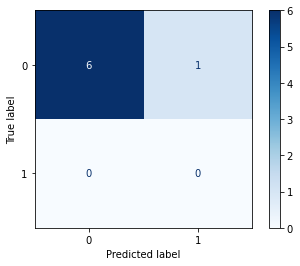

In [13]:
from sklearn.metrics import confusion_matrix,accuracy_score,plot_confusion_matrix
cm = confusion_matrix(y_test,predicted)
acc = accuracy_score(y_test,predicted)
print(cm)
print(acc)
plot_confusion_matrix(model,x_test,y_test,cmap=plt.cm.Blues)
plt.show()

**Displayed the classification report with parameters like precision , recall , f1-score and accuracy of the model**

In [14]:
print('Precision, Recall and f-1 Scores for Decision Tree Classifier\n')
print(classification_report(y_test, predicted))

Precision, Recall and f-1 Scores for Decision Tree Classifier

              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.00      0.00      0.00         0

    accuracy                           0.86         7
   macro avg       0.50      0.43      0.46         7
weighted avg       1.00      0.86      0.92         7



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Visualization of the decisionTree Classifier according to our dataset**

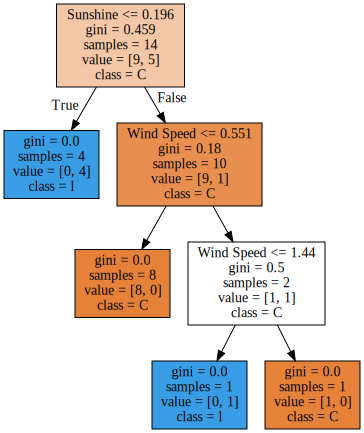

In [36]:
import graphviz
dot_data = tree.export_graphviz(model, out_file=None, 
                                feature_names=features,  
                                class_names=target,
                                filled=True)
graph = graphviz.Source(dot_data, format="png") 
graph